<a href="https://colab.research.google.com/github/DmitryVS/trash/blob/master/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

%matplotlib inline

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#1. Считать данные из csv в переменную;

df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Churn.csv')


In [59]:
#2. Получить первые 5 объектов;
print(f'Всего данных: {df.shape}')
df.head()

Всего данных: (3333, 20)


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [60]:
#3. Получить все признаки и составить к ним описание;
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
State                     3333 non-null object
Account length            3333 non-null int64
Area code                 3333 non-null int64
International plan        3333 non-null object
Voice mail plan           3333 non-null object
Number vmail messages     3333 non-null int64
Total day minutes         3333 non-null float64
Total day calls           3333 non-null int64
Total day charge          3333 non-null float64
Total eve minutes         3333 non-null float64
Total eve calls           3333 non-null int64
Total eve charge          3333 non-null float64
Total night minutes       3333 non-null float64
Total night calls         3333 non-null int64
Total night charge        3333 non-null float64
Total intl minutes        3333 non-null float64
Total intl calls          3333 non-null int64
Total intl charge         3333 non-null float64
Customer service calls    3333 non-null int64


In [56]:
#4. Получить размерность данных;
df.shape

(3333, 20)

In [17]:
#5. Получить название столбцов;
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [0]:
#6. Изменить тип колонки Churn;
df.astype({'Churn':int})

In [18]:
#7. Отсортировать набор данных по времени разговоров;

df.sort_values(by='Total day minutes').head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
1345,SD,98,415,No,No,0,0.0,0,0.00,159.6,130,13.57,167.1,88,7.52,6.8,1,1.84,4,True
1397,VT,101,510,No,No,0,0.0,0,0.00,192.1,119,16.33,168.8,95,7.60,7.2,4,1.94,1,False
2736,OK,127,510,No,Yes,27,2.6,113,0.44,254.0,102,21.59,242.7,156,10.92,9.2,5,2.48,3,False
2753,OH,134,415,No,No,0,7.8,86,1.33,171.4,100,14.57,186.5,80,8.39,12.9,2,3.48,2,False
1986,WI,70,415,No,No,0,7.9,100,1.34,136.4,83,11.59,156.6,89,7.05,12.1,1,3.27,0,False


In [54]:
#8. Получить средние значения числовых признаков среди нелояльных пользователей;
df1=df.loc[df['Churn']==0]
df1.mean()

Account length            100.793684
Area code                 437.074737
Number vmail messages       8.604561
Total day minutes         175.175754
Total day calls           100.283158
Total day charge           29.780421
Total eve minutes         199.043298
Total eve calls           100.038596
Total eve charge           16.918909
Total night minutes       200.133193
Total night calls         100.058246
Total night charge          9.006074
Total intl minutes         10.158877
Total intl calls            4.532982
Total intl charge           2.743404
Customer service calls      1.449825
Churn                       0.000000
dtype: float64

In [41]:
#9. Получить сколько в среднем в течение дня разговаривают по телефону нелояльные пользователи;

df1=df.loc[df['Churn']==0]
df.head()
df1['Total day calls'].mean()

100.28315789473685

In [53]:
#10. Сгруппировать данные по признаку:«Количество минут ночью»;
df2=df.groupby(['Total night minutes']).mean()
print(f'Всего данных: {df2.shape}')
df2.head(10)

Всего данных: (1591, 16)


,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
Total night minutes,,,,,,,,,,,,,,,,
23.2,76.0,415.0,22.0,160.10,107.0,27.220,168.7,136.0,14.34,102.0,1.04,9.5,4.0,2.57,3.0,0.0
43.7,152.0,415.0,0.0,206.30,98.0,35.070,292.8,82.0,24.89,121.0,1.97,10.6,4.0,2.86,1.0,0.0
45.0,42.0,408.0,0.0,146.30,84.0,24.870,255.9,113.0,21.75,117.0,2.03,8.0,12.0,2.16,1.0,0.0
47.4,146.0,510.0,0.0,138.40,104.0,23.530,158.9,122.0,13.51,73.0,2.13,3.9,9.0,1.05,4.0,1.0
50.1,143.5,411.5,12.5,179.55,97.0,30.525,152.6,100.0,12.97,73.5,2.25,13.4,3.5,3.62,1.5,0.0
53.3,101.0,415.0,0.0,118.60,89.0,20.160,199.6,97.0,16.97,61.0,2.40,11.5,5.0,3.11,1.0,0.0
54.0,123.0,408.0,0.0,154.30,107.0,26.230,183.0,111.0,15.56,134.0,2.43,10.9,8.0,2.94,0.0,0.0
54.5,165.0,415.0,0.0,207.70,109.0,35.310,164.8,94.0,14.01,91.0,2.45,7.9,3.0,2.13,0.0,0.0
56.6,176.0,415.0,0.0,169.50,151.0,28.820,112.9,84.0,9.60,99.0,2.55,8.7,4.0,2.35,0.0,0.0


In [51]:
#11. Получить наблюдения в контексте двух признаков:«Churn» и «International plan»;

print(df.loc[df['International plan']=='Yes'].count()[0])
print(df.loc[df['International plan']=='No'].count()[0])

print(df.loc[df['Churn']==1].count()[0])
print(df.loc[df['Churn']==0].count()[0])

323
3010
483
2850


In [0]:
#1. Отобразить линейный график от двух любых признаков;
import seaborn as sns


In [0]:
#2. Отобразить диаграмму рассеяния от всех признаков;


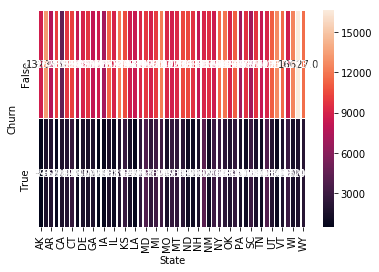

In [69]:
#3. Отобразить тепловую карту от трех любых признаков;
sales = df.pivot_table(index = 'Churn', 
                                      columns = 'State', 
                                      values = 'Total day minutes', 
                                     aggfunc=sum).fillna(0).applymap(int)
sns.heatmap(sales, annot=True, fmt=".1f", linewidths=.5)